<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**CONTESTO:** Rock o Hip-Hop? Applica metodi di machine learning per classificare i brani in generi musicali, senza doverli ascoltare :) 

**OBIETTIVO:** 

Utilizzando un set di dati composto da brani di due generi musicali (Hip-Hop e Rock), addestrerai un classificatore per distinguere tra i due generi in base solo alle informazioni sui brani derivate dai dati che hai a disposizione. Per prima cosa utilizzerai Pandas per analizzare i dati, aggregare informazioni e creare grafici con Seaborn o MatplotLib.

Successivamente, utilizzerai la libreria scikit-learn per prevedere se puoi classificare correttamente il genere di una canzone in base a caratteristiche come energia, acustica, tempo, ballabilità etc..


**Dati a disposizione:**

Qui puoi trovare due fonti dati, uno in formato csv e l'altro in formato json.

https://drive.google.com/drive/folders/1vPd0qBCpWm_QEXM5NRynNrs72-pUuhSn?usp=sharing

# First Step: Importare librerie e Data(Con relativa pulizia del DF)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import pandas_profiling as pp
from imblearn.under_sampling import RandomUnderSampler
pd.set_option('display.max_columns', None)


df_csv = pd.read_csv(r"C:\Users\tom07\Desktop\master\workshop 4\dataset.csv")
df_json = pd.read_json(r"C:\Users\tom07\Desktop\master\workshop 4\metrics.json")

In [3]:
df_csv.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
df_json.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


## Controllo presenza NaN and Outliers

In [5]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [6]:
df_csv.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [7]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [8]:
df_json.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


### Nel primo dataset possiamo notare diversi outliers
##### Proviamo a rimuoverli usando la deviazione standard !

In [9]:
std_deviation = df_csv.bit_rate.std()
mean_avg = df_csv.bit_rate.mean()

In [10]:
min_outliers=(mean_avg-(3*std_deviation))
max_outliers=((3*std_deviation)+mean_avg)

In [11]:
df_csv=df_csv[(df_csv.bit_rate > min_outliers)]
df_csv=df_csv[(df_csv.bit_rate < max_outliers)]

In [12]:
df_csv=df_csv[(df_csv.duration > df_csv.duration.mean()-(3*df_csv.duration.std()))]
df_csv=df_csv[(df_csv.duration < df_csv.duration.mean()+(3*df_csv.duration.std()))]

In [13]:
df_2=df_csv[["track_id","bit_rate","duration","genre_top","listens"]]
df_2

,track_id,bit_rate,duration,genre_top,listens
1,136,256000,509,Rock,1498
2,151,192000,192,Rock,148
3,152,192000,193,Rock,98
4,153,256000,405,Rock,424
5,154,256000,319,Rock,205
...,...,...,...,...,...
17729,155063,320000,283,Hip-Hop,1050
17730,155064,320000,250,Hip-Hop,858
17731,155065,320000,219,Hip-Hop,1142
17732,155066,320000,252,Hip-Hop,1474


### Merge dei due dataframe su colonna comune (track id)

In [14]:
df_merged= pd.merge(df_2,df_json, on=["track_id"])

In [15]:
df_merged = df_merged.drop("track_id",axis=1)

In [16]:
df_merged

,bit_rate,duration,genre_top,listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,256000,405,Rock,424,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
1,256000,319,Rock,205,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177,53.758,0.035632
2,192000,144,Rock,270,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406,94.322,0.028347
3,192000,181,Rock,122,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781,97.880,0.073548
4,320000,80,Rock,242,0.698278,0.285816,0.213494,9.556913e-01,0.087036,0.064094,125.645,0.150599
...,...,...,...,...,...,...,...,...,...,...,...,...
4677,224206,202,Hip-Hop,254,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4678,217951,201,Hip-Hop,175,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4679,199442,181,Hip-Hop,163,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4680,235940,140,Hip-Hop,287,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


# Data visualization

#### Come possiamo notare le labels sono fortemente sbilanciate, essendoci solo 887 del genere Hip-Hop e 3795 Rock

<AxesSubplot:xlabel='genre_top', ylabel='count'>

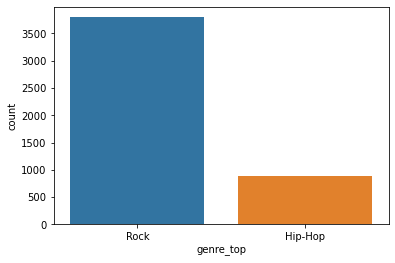

In [17]:
sns.countplot(x="genre_top", data=df_merged )

In [18]:
df_merged.genre_top.value_counts(normalize=True)*100

Rock       81.055105
Hip-Hop    18.944895
Name: genre_top, dtype: float64

genre_top
Hip-Hop    AxesSubplot(0.125,0.125;0.775x0.755)
Rock       AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

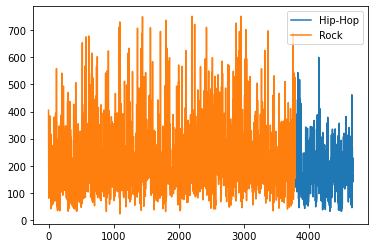

In [19]:
df_merged.groupby('genre_top')['duration'].plot(legend=True)

In [21]:
#profile = pp.ProfileReport(df_hm)
#profile.to_file("output.html")

## Encoding

### in questa fase cambieremo le labels ( ovvero rock e Hip-Hop) in 0 e 1

In [30]:
d = {'Rock': 0, 'Hip-Hop': 1}
df_merged['genre_top'] = df_merged['genre_top'].map(d)

In [32]:
df_merged.head()

,bit_rate,duration,genre_top,listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,256000,405,0,424,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,256000,319,0,205,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,192000,144,0,270,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
3,192000,181,0,122,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548
4,320000,80,0,242,0.698278,0.285816,0.213494,0.955691,0.087036,0.064094,125.645,0.150599


## Division Features e Labels

In [45]:
X = df_merged.drop("genre_top",axis=1)

In [46]:
X.head()

,bit_rate,duration,listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,256000,405,424,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,256000,319,205,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,192000,144,270,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
3,192000,181,122,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548
4,320000,80,242,0.698278,0.285816,0.213494,0.955691,0.087036,0.064094,125.645,0.150599


In [47]:
y = df_merged["genre_top"]

In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: genre_top, dtype: int64

## Scaling delle Features 

In [49]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [53]:
X

array([[ 0.14729591,  1.85692431, -0.08974992, ..., -0.35997891,
        -1.07501716, -1.59133763],
       [ 0.14729591,  1.02760879, -0.11862496, ..., -0.49514224,
        -2.15062451, -1.58526868],
       [-1.04480977, -0.65995186, -0.11005474, ..., -0.34846422,
        -0.95469938, -1.61266446],
       ...,
       [-0.90619023, -0.30315333, -0.12416264, ...,  0.86594019,
        -0.93810077, -0.0936603 ],
       [-0.22635471, -0.69852468, -0.1078133 , ...,  1.42819254,
         1.31565382,  0.46237847],
       [-1.03702382, -0.41887177, -0.0801249 , ...,  1.37858367,
        -1.44056976,  0.75018256]])

## Random Under Sampling della feature Rock per bilanciare 

In [54]:
rus = RandomUnderSampler(sampling_strategy=1)
X_res,y_res = rus.fit_resample(X,y)

<AxesSubplot:ylabel='genre_top'>

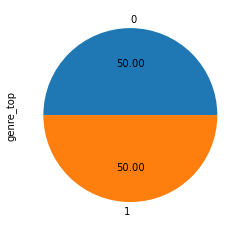

In [60]:
y_res.value_counts().plot.pie(autopct="%.2f")

## Train - Test split 

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_res, y_res, test_size=0.25, random_state=42)

## Utilizzo di decision tree classifier e KNN

In [62]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

In [66]:
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)
y_pred_neigh = neigh.predict(X_test)

## Valutazione dei modelli

In [69]:
target_names = ["Rock","Hip-Hop"]

### Decision Tree

In [70]:
print(classification_report(y_test,y_pred_clf,target_names=target_names))

              precision    recall  f1-score   support

        Rock       0.88      0.84      0.86       225
     Hip-Hop       0.84      0.89      0.86       219

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444



### KNN

In [71]:
print(classification_report(y_test,y_pred_neigh,target_names=target_names))

              precision    recall  f1-score   support

        Rock       0.86      0.91      0.88       225
     Hip-Hop       0.90      0.84      0.87       219

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88       444

